<a href="https://colab.research.google.com/github/barbarosugurkan/kahvelab-beam-analysis/blob/main/02-08-25/9_a%C4%9Fustos_5x5_histogram_ve_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

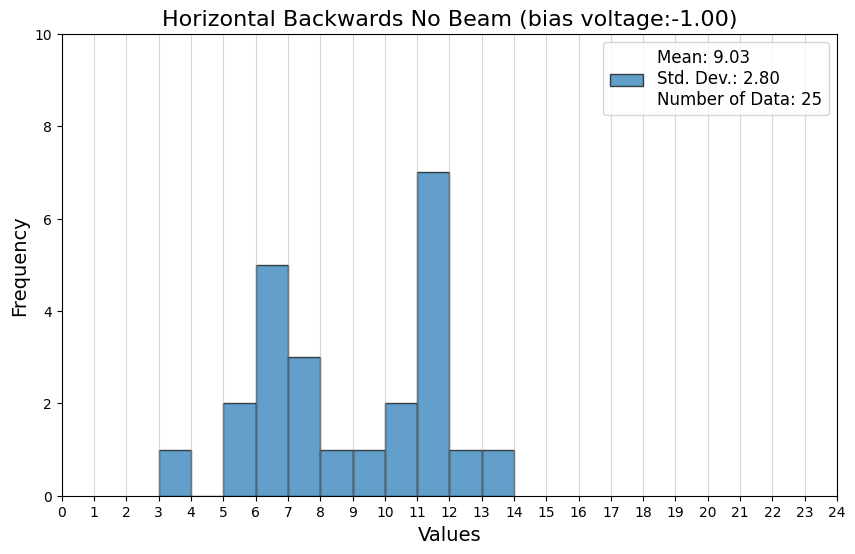

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

def extract_value_from_file(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if "ADC : channel #   0 reading =" in line:
                value_str = line.split("ADC : channel #   0 reading =")[1].split("+-")[0].strip()
                try:
                    return float(value_str)
                except ValueError:
                    print(f"⚠️ Error converting value in {file_path}: Not a valid float.")
                    return None
    print(f"⚠️ Warning: No ADC reading found in {file_path}.")
    return None


adc_value_list = []

main_folder_path = "/content/drive/MyDrive/Colab Notebooks/datasets/02.08.25/no.beam.hor2/1/"
for i in range(1,26):
  if i <= 9:
    file_path = main_folder_path + "/SEMtest0." + str(i) + ".adc"
  else:
    file_path = main_folder_path + "/SEMtest" + str(i//10) + "." + str(i%10) + ".adc"

  adc_value_list.append(extract_value_from_file(file_path))

# Ayarlanabilir bin genişliği
bin_width = 1 # Bu değeri istediğiniz gibi değiştirebilirsiniz

# Minimum ve maksimum değerleri bulma
min_val = int(min(adc_value_list))
max_val = int(max(adc_value_list))

# Binlerin kenarlarını hesaplama
bins = np.arange(min_val, max_val + bin_width, bin_width)

# Verilerin istatistiklerini hesaplama
mean_data = np.mean(adc_value_list)
std_dev_data = np.std(adc_value_list)
num_data_points = len(adc_value_list)

# Histogramı çizme
plt.figure(figsize=(10, 6)) # Grafiğin boyutunu ayarlama
plt.hist(adc_value_list, bins=bins, edgecolor='black', alpha=0.7)

# Başlık ve eksen etiketleri
plt.title('Horizontal Backwards No Beam (bias voltage:-1.00)', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Sağ üst köşeye istatistikleri eklemek için legend oluşturma
legend_text = f'Mean: {mean_data:.2f}\nStd. Dev.: {std_dev_data:.2f}\nNumber of Data: {num_data_points}'
plt.legend([legend_text], loc='upper right', frameon=True, fontsize=12)

# Izgarayı gösterme
plt.grid(axis='x', alpha=0.5)

plt.xlim(0,24)
plt.ylim(0,10)
integer_ticks = np.arange(0, 24 + 1, bin_width)
plt.xticks(integer_ticks)

# Grafiği gösterme
plt.show()


# **4 hist in same graph**

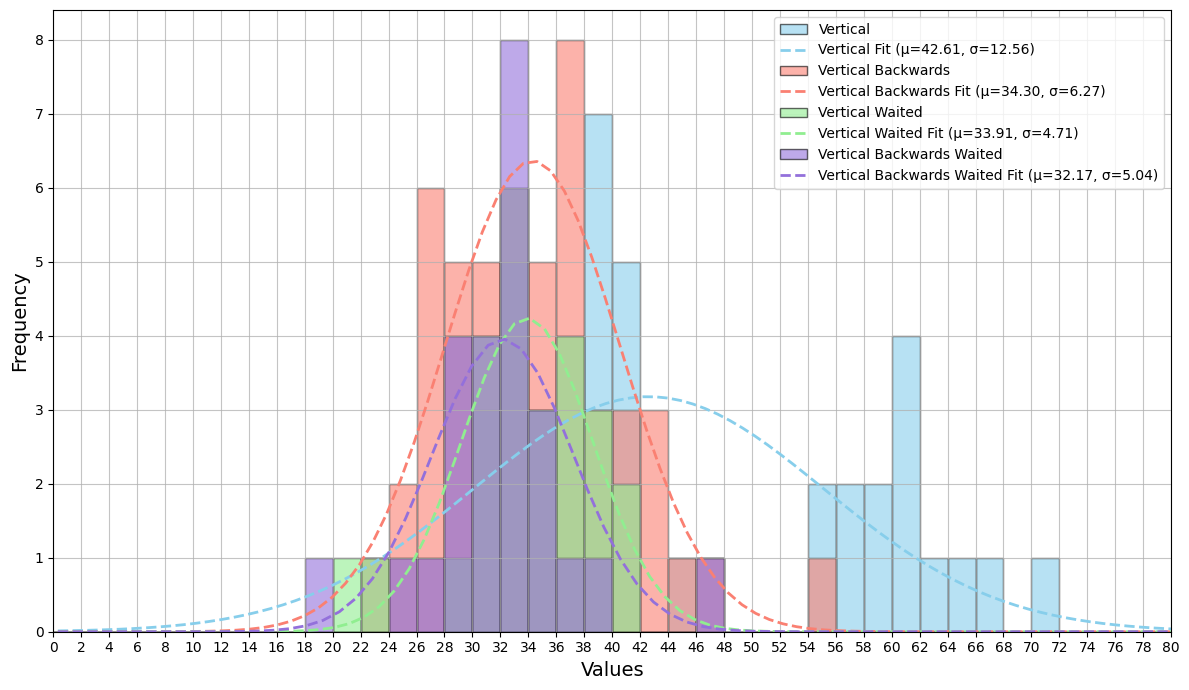

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

def extract_value_from_file(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if "ADC : channel #   0 reading =" in line:
                value_str = line.split("ADC : channel #   0 reading =")[1].split("+-")[0].strip()
                try:
                    return float(value_str)
                except ValueError:
                    print(f"⚠️ Error converting value in {file_path}: Not a valid float.")
                    return None
    print(f"⚠️ Warning: No ADC reading found in {file_path}.")
    return None

def create_list_of_data(path,which_type,start=None,end=None):
  value_list = []
  if which_type == 1:
    for i in range(1,26):
      if i <= 9:
        file_path = path + "/SEMtest0." + str(i) + ".adc"
      else:
        file_path = path + "/SEMtest" + str(i//10) + "." + str(i%10) + ".adc"

      value_list.append(extract_value_from_file(file_path))

  if which_type == 2:
    for i in range(start,end+1):
      sub_folder_path = path + "/" + str(i)
      for j in range(10):
        file_path = sub_folder_path + "/SEMtest0." + str(j) + ".adc"
        value_list.append(extract_value_from_file(file_path))

  return value_list

vertical_list = create_list_of_data("/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_ver copy",2,1,5)
vertical_backwards_list = create_list_of_data("/content/drive/MyDrive/Colab Notebooks/datasets/Archive250725/5x5_ver_backwards copy",2,6,10)
horizontal_list = create_list_of_data("/content/drive/MyDrive/Colab Notebooks/datasets/02.08.25/vertical.wait/1/",1)
horizontal_backwards_list = create_list_of_data("/content/drive/MyDrive/Colab Notebooks/datasets/02.08.25/vertical.wait2/1/",1)

all_data = [vertical_list,vertical_backwards_list,horizontal_list,horizontal_backwards_list]
labels = ["Vertical","Vertical Backwards","Vertical Waited","Vertical Backwards Waited"]
colors = ['skyblue', 'salmon', 'lightgreen', 'mediumpurple']

bin_width = 2
x_min_fixed = 0
x_max_fixed = 80

bins = np.arange(x_min_fixed, x_max_fixed + bin_width, bin_width)
plt.figure(figsize=(12, 7))

for i, data in enumerate(all_data):
    counts, bin_edges, _ = plt.hist(data, bins=bins, color=colors[i],
                                    edgecolor='black', alpha=0.6,
                                    label=labels[i]) # density=True önemli

    mu, std = norm.fit(data) # Ortalama (mu) ve Standart Sapma (std) fit için

    # Normal dağılımın PDF'ini (Olasılık Yoğunluk Fonksiyonu) hesaplama
    # X değerlerini binlerin ortasından alabiliriz veya daha pürüzsüz bir çizgi için daha fazla nokta oluşturabiliriz.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100) # 100 nokta ile pürüzsüz bir eğri için

    p_scaled = norm.pdf(x, mu, std) * len(data) * bin_width

    # Normal dağılım eğrisini çizme
    plt.plot(x, p_scaled, color=colors[i], linestyle='--', linewidth=2,
             label=f'{labels[i]} Fit (μ={mu:.2f}, σ={std:.2f})')

plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xlim(x_min_fixed, x_max_fixed)
integer_ticks = np.arange(x_min_fixed, x_max_fixed + 1, bin_width)
plt.xticks(integer_ticks)

plt.grid(axis='both', alpha=0.75)

plt.legend(loc='upper right', fontsize=10, frameon=True, bbox_to_anchor=(1.0, 1.0))

# Grafiği düzenlemek için boşlukları ayarlama
plt.tight_layout()

# Grafiği gösterme
plt.show()



# **25 veri tek bi klasörde (average diff gibi şeyler yok)**

In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt # Not used but kept from original code
import plotly.graph_objects as go

# --- Global Configuration Flags ---
main_directory_path = "/content/drive/MyDrive/Colab Notebooks/datasets/02.08.25/vertical.wait2/1"
IS_VERTICAL = True
IS_BACKWARDS = True
name_of_the_plot = "Front Side - Vertical Backwards Waited (bias voltage:-0.74)"

# Regular expression to extract numeric values from filenames like "SEMtest0.5.adc"
def extract_number(filename):
    """
    Extracts the numeric part from filenames (e.g., "0.1", "2.5") to enable proper sorting.
    """
    match = re.search(r"SEMtest(\d+\.\d+|\d+)", filename)
    return float(match.group(1)) if match else float('inf')

# Function to extract ADC reading from a file
def extract_value_from_file(file_path):
    """
    Reads a given .adc file and extracts the 'ADC : channel # 0 reading =' value.
    Returns the value as a float or None if not found/invalid.
    """
    try:
        with open(file_path, 'r') as file:
            for line in file:
                if "ADC : channel #   0 reading =" in line:
                    value_str = line.split("ADC : channel #   0 reading =")[1].split("+-")[0].strip()
                    try:
                        return float(value_str)
                    except ValueError:
                        print(f"⚠️ Error converting value in {file_path}: Not a valid float.")
                        return None
        print(f"⚠️ Warning: No ADC reading found in {file_path}.")
        return None
    except FileNotFoundError:
        print(f"⚠️ Error: File not found at {file_path}.")
        return None
    except Exception as e:
        print(f"⚠️ An unexpected error occurred while reading {file_path}: {e}")
        return None

# --- NEW FUNCTION FOR SINGLE DIRECTORY PROCESSING ---
def process_single_directory(directory_path, is_vertical_scan):
    """
    Processes all files in a single directory to create a 5x5 matrix.
    Each file corresponds to a single data point.
    """
    matrix_size = 5
    matrix_data = np.full((matrix_size, matrix_size), np.nan)
    matrix_file_mapping = np.full((matrix_size, matrix_size), "MISSING", dtype=object)

    # Get all .adc files and sort them numerically
    try:
        files = sorted(
            [f for f in os.listdir(directory_path) if f.endswith(".adc")],
            key=extract_number
        )
    except FileNotFoundError:
        print(f"🔴 Error: Directory not found at {directory_path}. Exiting.")
        return matrix_data, matrix_file_mapping

    print(f"📂 Sorted files to process ({len(files)} found):")
    # Limit the number of files to process to a maximum of 25 for a 5x5 matrix
    files_to_process = files[:matrix_size * matrix_size]

    # Iterate through the sorted files and populate the matrix
    for i, filename in enumerate(files_to_process):
        file_path = os.path.join(directory_path, filename)
        value = extract_value_from_file(file_path)

        # Calculate row and column indices based on the scan orientation
        if not is_vertical_scan:
            # Horizontal scan (Row-major order): Fills matrix row by row
            row_index = i // matrix_size
            col_index = i % matrix_size
        else:
            # Vertical scan (Column-major order): Fills matrix column by column
            row_index = i % matrix_size
            col_index = i // matrix_size

        # Assign the extracted value and filename to the matrix
        matrix_data[row_index, col_index] = value
        matrix_file_mapping[row_index, col_index] = filename

        print(f"📝 Matrix[{row_index}, {col_index}] ← {filename}")

    return matrix_data, matrix_file_mapping

# --- Main Program Logic ---

# 1. Process data from the single directory
matrix_data, matrix_file_order_np = process_single_directory(main_directory_path, IS_VERTICAL)

# 2. Apply the backwards scan if required
if IS_BACKWARDS:
    # Reverse rows and then columns
    matrix_data = matrix_data[::-1, ::-1]
    matrix_file_order_np = matrix_file_order_np[::-1, ::-1]

# 3. Verify matrix dimensions
print(f"✅ Final Matrix shape: {matrix_data.shape}")  # Should be (5, 5)

# 4. Print matrix file mapping for debugging
print("\n📌 File Mapping in Final Matrix (Order):\n")
for row in matrix_file_order_np:
    print(row)

# 5. Function to Create a Plotly Visualization (No changes here, it's general purpose)
def create_plotly_visualization(matrix_data, title):
    """
    Generates an interactive Plotly scatter plot from the given matrix data.
    The matrix is assumed to be in (rows, columns) format.
    """
    N, M = matrix_data.shape
    x_coords, y_coords = np.meshgrid(np.arange(M) * 0.5, np.arange(N) * 0.5)
    x_flat, y_flat, quantities_flat = x_coords.flatten(), y_coords.flatten(), matrix_data.flatten()

    fig = go.Figure(data=go.Scatter(
        x=x_flat, y=y_flat, mode='markers',
        marker=dict(
            size=15, color=quantities_flat, colorscale='gray_r',
            showscale=True, colorbar=dict(title="ADC Value"),
            line=dict(width=1, color='DarkSlateGrey')
        ),
        text=[f"({int(y_coords[idx//M, idx%M])}, {int(x_coords[idx//M, idx%M])})<br>Value: {val:.2f}<br>File: {matrix_file_order_np.flatten()[idx]}"
              for idx, val in enumerate(quantities_flat)],
        hoverinfo='text'
    ))

    fig.update_layout(
        title={'text': title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
        xaxis_title="X Axis (mm)",
        yaxis_title="Y Axis (mm)",
        yaxis_autorange='reversed',
        width=700, height=700, template="plotly_white",
        margin=dict(l=50, r=50, t=80, b=50)
    )
    fig.show()

# 6. Create and display the visualization
create_plotly_visualization(matrix_data, name_of_the_plot)


📂 Sorted files to process (25 found):
📝 Matrix[0, 0] ← SEMtest0.1.adc
📝 Matrix[1, 0] ← SEMtest0.2.adc
📝 Matrix[2, 0] ← SEMtest0.3.adc
📝 Matrix[3, 0] ← SEMtest0.4.adc
📝 Matrix[4, 0] ← SEMtest0.5.adc
📝 Matrix[0, 1] ← SEMtest0.6.adc
📝 Matrix[1, 1] ← SEMtest0.7.adc
📝 Matrix[2, 1] ← SEMtest0.8.adc
📝 Matrix[3, 1] ← SEMtest0.9.adc
📝 Matrix[4, 1] ← SEMtest1.0.adc
📝 Matrix[0, 2] ← SEMtest1.1.adc
📝 Matrix[1, 2] ← SEMtest1.2.adc
📝 Matrix[2, 2] ← SEMtest1.3.adc
📝 Matrix[3, 2] ← SEMtest1.4.adc
📝 Matrix[4, 2] ← SEMtest1.5.adc
📝 Matrix[0, 3] ← SEMtest1.6.adc
📝 Matrix[1, 3] ← SEMtest1.7.adc
📝 Matrix[2, 3] ← SEMtest1.8.adc
📝 Matrix[3, 3] ← SEMtest1.9.adc
📝 Matrix[4, 3] ← SEMtest2.0.adc
📝 Matrix[0, 4] ← SEMtest2.1.adc
📝 Matrix[1, 4] ← SEMtest2.2.adc
📝 Matrix[2, 4] ← SEMtest2.3.adc
📝 Matrix[3, 4] ← SEMtest2.4.adc
📝 Matrix[4, 4] ← SEMtest2.5.adc
✅ Final Matrix shape: (5, 5)

📌 File Mapping in Final Matrix (Order):

['SEMtest2.5.adc' 'SEMtest2.0.adc' 'SEMtest1.5.adc' 'SEMtest1.0.adc'
 'SEMtest0.5.adc']
['S